In [52]:
%matplotlib inline
import os
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import RenewAI
sys.path.append('/Users/tmorales/tmp/RNN-windPower/src')
from pre_process.split_ml_ts import dataframe_split

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.externals import joblib
from sklearn.metrics.regression import mean_squared_error
from sklearn.metrics.regression import mean_absolute_error

In [3]:
exp_path = '/Users/tmorales/tmp/experiments/NREL/Offshore_WA_OR/turbine_25915'
experiment = 'K-nearest-regressor'
directory = os.path.join(exp_path, experiment)
if not os.path.exists(directory):
    os.makedirs(directory)

## Load file

In [4]:
path = '/Users/tmorales/tmp/RNN-windPower/database/wind_farms/Offshore_WA_OR/Offshore_WA_OR_features'

In [5]:
os.chdir(path)
files = [file for file in glob.glob('Offshore_WA_OR_features_*.csv')]
files

['Offshore_WA_OR_features_h_01.csv',
 'Offshore_WA_OR_features_h_02.csv',
 'Offshore_WA_OR_features_h_03.csv',
 'Offshore_WA_OR_features_h_04.csv',
 'Offshore_WA_OR_features_h_05.csv',
 'Offshore_WA_OR_features_h_06.csv',
 'Offshore_WA_OR_features_h_07.csv',
 'Offshore_WA_OR_features_h_08.csv',
 'Offshore_WA_OR_features_h_09.csv',
 'Offshore_WA_OR_features_h_10.csv',
 'Offshore_WA_OR_features_h_11.csv',
 'Offshore_WA_OR_features_h_12.csv',
 'Offshore_WA_OR_features_h_13.csv',
 'Offshore_WA_OR_features_h_14.csv',
 'Offshore_WA_OR_features_h_15.csv',
 'Offshore_WA_OR_features_h_16.csv',
 'Offshore_WA_OR_features_h_17.csv',
 'Offshore_WA_OR_features_h_18.csv',
 'Offshore_WA_OR_features_h_19.csv',
 'Offshore_WA_OR_features_h_20.csv',
 'Offshore_WA_OR_features_h_21.csv',
 'Offshore_WA_OR_features_h_22.csv',
 'Offshore_WA_OR_features_h_23.csv',
 'Offshore_WA_OR_features_h_24.csv']

##  Paso 1: only one h-step

In [7]:
h1 = files[0]

In [27]:
# create directory for each horizont (each horizon is a regressor)
horizont = 1
directory_by_horizont = os.path.join(exp_path, 
                                     'K-nearest-regressor',
                                     'model_saved_h={0:03d}'.format(horizont))
if not os.path.exists(directory_by_horizont):
    os.makedirs(directory_by_horizont)

In [14]:
# load file
df_h1 = pd.read_csv(files[0], delimiter=';', index_col=0)
df_h1.head(4)

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1
target_date,,,,,,,
2004-01-01 06:00:00,6.96,5.28,5.32,4.93,4.05,3.95,4.19
2004-01-01 07:00:00,5.28,5.32,4.93,4.05,3.95,4.19,4.89
2004-01-01 08:00:00,5.32,4.93,4.05,3.95,4.19,4.89,5.16
2004-01-01 09:00:00,4.93,4.05,3.95,4.19,4.89,5.16,5.01


In [16]:
# select the best model for h=1

# split the dataset in train, val and test
data = dataframe_split(df_h1)
train_set = data['train_set']
validation_set = data['validation_set']
test_set = data['test_set']


# features and target columns
features_columns = train_set.columns[1:-1]
target_column = train_set.columns[-1:]

# select the values of features and target columns.
features_train_set = train_set[features_columns]
target_train_set = train_set[target_column]
features_validation_set = validation_set[features_columns]
target_validation_set = validation_set[target_column]

In [18]:
print('features columns: {0}'.format(features_columns))
print('target column: {0}'.format(target_column))

features columns: Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5'], dtype='object')
target column: Index(['target_h1'], dtype='object')


In [20]:
features_train_set.head()

,f_1,f_2,f_3,f_4,f_5
target_date,,,,,
2006-03-27 10:00:00,1.36,0.60,1.23,2.73,6.36
2006-03-04 16:00:00,6.71,7.62,7.12,8.17,7.16
2006-03-29 00:00:00,12.00,13.51,12.37,12.53,12.63
2005-10-23 12:00:00,0.55,0.58,0.79,1.02,1.82
2005-11-18 23:00:00,11.49,7.34,4.99,7.22,9.87


In [35]:
features_train_set.values

array([[  1.36,   0.6 ,   1.23,   2.73,   6.36],
       [  6.71,   7.62,   7.12,   8.17,   7.16],
       [ 12.  ,  13.51,  12.37,  12.53,  12.63],
       ..., 
       [  1.53,   0.97,   0.89,   1.2 ,   1.81],
       [  6.59,   5.45,   4.86,   4.75,   4.95],
       [  7.03,   7.22,   8.47,  10.3 ,  12.  ]])

In [21]:
target_train_set.head()

,target_h1
target_date,
2006-03-27 10:00:00,8.15
2006-03-04 16:00:00,8.54
2006-03-29 00:00:00,11.25
2005-10-23 12:00:00,1.88
2005-11-18 23:00:00,10.53


In [34]:
target_train_set.values

array([[  8.15],
       [  8.54],
       [ 11.25],
       ..., 
       [  2.01],
       [  4.91],
       [ 13.56]])

In [22]:
features_validation_set.head()

,f_1,f_2,f_3,f_4,f_5
target_date,,,,,
2004-12-21 21:00:00,4.97,4.93,4.68,4.80,6.11
2005-04-14 03:00:00,3.37,2.67,3.48,3.40,4.01
2006-01-22 05:00:00,0.38,0.51,1.05,1.38,1.59
2005-10-06 01:00:00,1.61,1.58,1.95,2.71,3.65
2005-10-17 14:00:00,5.59,5.12,4.37,3.90,3.43


In [24]:
target_validation_set.head()

,target_h1
target_date,
2004-12-21 21:00:00,7.06
2005-04-14 03:00:00,2.69
2006-01-22 05:00:00,1.25
2005-10-06 01:00:00,4.17
2005-10-17 14:00:00,2.85


In [36]:
x_train = features_train_set.values; y_train = target_train_set.values
x_val = features_validation_set.values; y_val = target_validation_set.values

In [50]:
# select the best model
n_neighbors = 40
weights='uniform'

history = {} # dictionary with all metrics
mse = [] ; val_mse = [] # mean squared error
number_neighbors = range(2, n_neighbors, 2)
for n_neighbors in number_neighbors:
    print('*** N neighbors: {0}'.format(n_neighbors))
    # - model parameters
    knr = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
    # - fit the data 
    knr = knr.fit(x_train, y_train)
    # - save del model
    #path_model_saved = os.path.join(directory_by_horizont, 
    #                                'K-nearest_regressor_{0:03d}_{1}'.format(n_neighbors,
    #                                                                             weights))
    #joblib.dump(knr, path_model_saved)
    # - overfitting: evaluate train and validation set on the fitted model. 
    y_train_eval = knr.predict(x_train)
    y_val_eval = knr.predict(x_val)
    # - metric calculation
    mse_train = mean_squared_error(y_train, y_train_eval)
    mse_validation = mean_absolute_error(y_val, y_val_eval)
    # for each k-neighbors confoguration save the metrics inside a list 
    mse.append(mse_train); val_mse.append(mse_validation)

history['mse'] = mse
history['val_mse'] = val_mse

*** N neighbors: 2
*** N neighbors: 4
*** N neighbors: 6
*** N neighbors: 8
*** N neighbors: 10
*** N neighbors: 12
*** N neighbors: 14
*** N neighbors: 16
*** N neighbors: 18
*** N neighbors: 20
*** N neighbors: 22
*** N neighbors: 24
*** N neighbors: 26
*** N neighbors: 28
*** N neighbors: 30
*** N neighbors: 32
*** N neighbors: 34
*** N neighbors: 36
*** N neighbors: 38


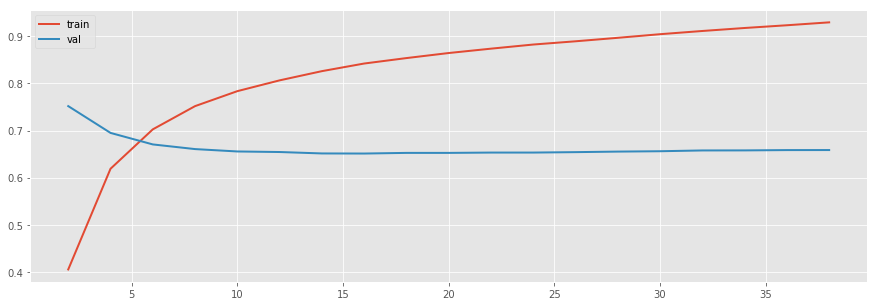

In [53]:
f = plt.figure(figsize=(15, 5))
plt.plot(number_neighbors, history['mse'], lw=2, label='train')
plt.plot(number_neighbors, history['val_mse'], lw=2, label='val')
plt.legend()

## K- Nearest

In [41]:
# features and target columns
features_columns = train_set.columns[1:-1]
target_column = train_set.columns[-1:]

# select the values of features and target columns.
features_train_set = train_set[features_columns]
target_train_set = train_set[target_column]
features_validation_set = validation_set[features_columns]
target_validation_set = validation_set[target_column]

In [148]:
def plot_fitting(history, path, horizont=None, title='ml-model'):
    f = plt.figure(figsize=(15,5))
    number_neighbors = range(len(history['mse']))
    plt.plot(number_neighbors, history['mse'], lw=2, label='train')
    plt.plot(number_neighbors, history['val_mse'], lw=2, label='validation')
    plt.title(title)
    plt.ylabel('MSE')
    plt.xlabel('Neighbor')
    plt.grid()
    plt.legend()
    
    plot_directory = os.path.join(path, 'plot_fit')
    if not os.path.exists(plot_directory):
        os.makedirs(plot_directory)
    plt.savefig(os.path.join(plot_directory, 'K-nearest_fit_h{0:02d}.png'.format(horizont)));
    print('plot saved in.....')

In [146]:
def select_best_model(train_set, validation_set, horizont=1,
                      n_neighbors=70, weights='uniform',
                      exp_path=os.getcwd()):
    # features and target columns
    features_columns = train_set.columns[1:-1]
    target_column = train_set.columns[-1:]

    # select the values of features and target columns.
    features_train_set = train_set[features_columns]
    target_train_set = train_set[target_column]
    features_validation_set = validation_set[features_columns]
    target_validation_set = validation_set[target_column]
    
    # select the best model
    history = {} # dictionary with all metrics
    mse = [] ; val_mse = [] # mean squared error
    number_neighbors = range(2, n_neighbors, 2)
    for n_neighbors in number_neighbors:
        print('*** N neighbors: {0}'.format(n_neighbors))
        knr = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
        knr = knr.fit(features_train_set, target_train_set)
        path_model_saved = os.path.join(exp_path, 
                                        'K-nearest_regressor_{0:03d}_{1}'.format(n_neighbors,
                                                                                 weights))
        joblib.dump(knr, path_model_saved)
        # overfitting: evaluate train and validation set on the fitted model. 
        evaluate_train = knr.predict(features_train_set)
        evaluate_validation = knr.predict(features_validation_set)
        # metric calculation
        mse_train = mean_squared_error(target_train_set.values, 
                                       evaluate_train)
        mse_validation = mean_absolute_error(target_validation_set.values,
                                             evaluate_validation)
        mse.append(mse_train); val_mse.append(mse_validation)
        #mean_squared_error()
        #mean_absolute_error()
    
    history['mse'] = mse
    history['val_mse'] = val_mse
    
    return history

In [ ]:
def write_ml_history(history, filename='ml-history'):
    df = pd.DataFrame({history}, index='')
    df.to_csv('{0}.csv'.format(filename))

In [ ]:
for i, file in enumerate(files):
    horizont = i+1
    n_neighbors = 70
    weights = 'distance'
    print('Horizonte: {0}'.format(horizont))
    print('N neighbors: {0}'.format(n_neighbors))
    # create directory for each horizont (each horizon is a regressor)
    directory_by_horizont = os.path.join(exp_path, 
                                         'K-nearest-regressor',
                                         'model_saved_h={0:03d}'.format(horizont))
    if not os.path.exists(directory_by_horizont):
        os.makedirs(directory_by_horizont)
    # load file
    df = pd.read_csv(file, delimiter=';', index_col=0)
    # split dataset
    data = dataframe_split(h1)
    train_set = data['train_set']
    val_set = data['validation_set']
    test_set = data['test_set']
    # select the best model
    history = select_best_model(train_set, val_set, n_neighbors=n_neighbors, horizont=horizont, 
                                exp_path=directory_by_horizont)
    # plot the histories
    title_string = 'k-nearest h = {0}\nn-neighbors = {1}; weights = {2}'
    plot_path = os.path.join(exp_path, 'K-nearest-regressor')
    plot_fitting(history, plot_path, horizont=horizont, title=title_string)
    # write history
    df_history = pd.DataFrame(history)
    print(df_history.shape[0])
        
    

Horizonte: 1
N neighbors: 70
*** N neighbors: 2
*** N neighbors: 4
*** N neighbors: 6
*** N neighbors: 8
*** N neighbors: 10
*** N neighbors: 12
*** N neighbors: 14
*** N neighbors: 16
*** N neighbors: 18
*** N neighbors: 20
*** N neighbors: 22
*** N neighbors: 24
*** N neighbors: 26
*** N neighbors: 28
*** N neighbors: 30
*** N neighbors: 32
*** N neighbors: 34
*** N neighbors: 36
*** N neighbors: 38
*** N neighbors: 40
*** N neighbors: 42
*** N neighbors: 44
*** N neighbors: 46
*** N neighbors: 48
*** N neighbors: 50
*** N neighbors: 52
*** N neighbors: 54
*** N neighbors: 56
*** N neighbors: 58
*** N neighbors: 60
*** N neighbors: 62
*** N neighbors: 64
*** N neighbors: 66
*** N neighbors: 68
plot saved in.....
34
Horizonte: 2
N neighbors: 70
*** N neighbors: 2
*** N neighbors: 4
*** N neighbors: 6
*** N neighbors: 8
*** N neighbors: 10
*** N neighbors: 12
*** N neighbors: 14
*** N neighbors: 16
*** N neighbors: 18
*** N neighbors: 20
*** N neighbors: 22
*** N neighbors: 24
*** N ne

*** N neighbors: 20
*** N neighbors: 22
*** N neighbors: 24
*** N neighbors: 26
*** N neighbors: 28
*** N neighbors: 30
*** N neighbors: 32
*** N neighbors: 34
*** N neighbors: 36
*** N neighbors: 38
*** N neighbors: 40
*** N neighbors: 42
*** N neighbors: 44
*** N neighbors: 46
*** N neighbors: 48
*** N neighbors: 50
*** N neighbors: 52
*** N neighbors: 54
*** N neighbors: 56
*** N neighbors: 58
*** N neighbors: 60
*** N neighbors: 62
*** N neighbors: 64
*** N neighbors: 66
*** N neighbors: 68
plot saved in.....
34
Horizonte: 13
N neighbors: 70
*** N neighbors: 2
*** N neighbors: 4
*** N neighbors: 6
*** N neighbors: 8
*** N neighbors: 10
*** N neighbors: 12
*** N neighbors: 14
*** N neighbors: 16
*** N neighbors: 18
*** N neighbors: 20
*** N neighbors: 22
*** N neighbors: 24
*** N neighbors: 26
*** N neighbors: 28
*** N neighbors: 30
*** N neighbors: 32
*** N neighbors: 34
*** N neighbors: 36
*** N neighbors: 38
*** N neighbors: 40
*** N neighbors: 42
*** N neighbors: 44
*** N neighb

'/Users/tmorales/tmp/experiments/NREL/Offshore_WA_OR/turbine_25915'